<a href="https://colab.research.google.com/github/Idzhar16/Capstone/blob/main/inipalingbarutapiformatpb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/Dataset_Capstone/coba.zip" -d "/content"

Archive:  /content/drive/MyDrive/Dataset_Capstone/coba.zip
   creating: /content/coba/
  inflating: /content/coba/aqua1.jpeg  
  inflating: /content/coba/aqua10.jpeg  
  inflating: /content/coba/aqua2.jpeg  
  inflating: /content/coba/aqua3.jpeg  
  inflating: /content/coba/aqua4.jpeg  
  inflating: /content/coba/aqua5.jpeg  
  inflating: /content/coba/aqua6.jpeg  
  inflating: /content/coba/aqua7.jpeg  
  inflating: /content/coba/aqua8.jpeg  
  inflating: /content/coba/aqua9.jpeg  
  inflating: /content/coba/coca cola1.jpeg  
  inflating: /content/coba/coca cola10.jpeg  
  inflating: /content/coba/coca cola2.jpeg  
  inflating: /content/coba/coca cola3.jpeg  
  inflating: /content/coba/coca cola4.jpeg  
  inflating: /content/coba/coca cola5.jpeg  
  inflating: /content/coba/coca cola6.jpeg  
  inflating: /content/coba/coca cola7.jpeg  
  inflating: /content/coba/coca cola8.jpeg  
  inflating: /content/coba/coca cola9.jpeg  
  inflating: /content/coba/mizone1.jpeg  
  inflating: /conte

# Split Train and Validation

In [3]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2M
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [4]:
# Specify the paths to original dataset and the destination directory
original_dataset_path = 'coba/'
destination_path = '/content/dataset'

# Get a list of all subdirectories in the original dataset path
class_directories = os.listdir(original_dataset_path)
train_split_ratio = 0.8
print(class_directories)

['golda6.jpeg', 'sprite10.jpeg', 'fruit tea5.jpeg', 'aqua8.jpeg', 'fanta8.jpeg', 'teh botol1.jpeg', 'aqua9.jpeg', 'nutri boost10.jpeg', 'golda3.jpeg', 'fanta1.jpeg', 'fruit tea1.jpeg', 'golda2.jpeg', 'pocari6.jpeg', 'aqua5.jpeg', 'nutri boost3.jpeg', 's tee3.jpeg', 'sprite1.jpeg', 'pocari2.jpeg', 'teh pucuk6.jpeg', 'mizone3.jpeg', 'fanta10.jpeg', 'nutri boost4.jpeg', 'golda1.jpeg', 'tebs5.jpeg', 'coca cola4.jpeg', 'nutri boost5.jpeg', 'nutri boost8.jpeg', 'aqua4.jpeg', 'pulpy10.jpeg', 'mizone1.jpeg', 'pocari4.jpeg', 'fanta2.jpeg', 'nutri boost2.jpeg', 'pulpy5.jpeg', 'teh pucuk8.jpeg', 'pulpy8.jpeg', 'aqua1.jpeg', 'sprite4.jpeg', 's tee10.jpeg', 'teh pucuk4.jpeg', 'fruit tea6.jpeg', 's tee7.jpeg', 'teh botol10.jpeg', 'pulpy9.jpeg', 'nutri boost9.jpeg', 'pulpy1.jpeg', 'nutri boost7.jpeg', 'fanta7.jpeg', 'tebs10.jpeg', 's tee2.jpeg', 'fanta4.jpeg', 'teh pucuk5.jpeg', 'fanta3.jpeg', 'mizone8.jpeg', 'coca cola3.jpeg', 'pocari3.jpeg', 'coca cola2.jpeg', 'teh pucuk10.jpeg', 'nutri boost6.jpeg

In [5]:
class_dict = {}
for i, class_directory in enumerate(class_directories):
    class_path = os.path.join(original_dataset_path, class_directory)

    # Check if the item in the directory is a directory itself
    if os.path.isdir(class_path):
        class_dict[i] = class_directory
        # Create a destination directory for the class in the new structure
        # Create a destination directory for the class in the new structure
        destination_train_class_path = os.path.join(destination_path, 'train', class_directory)
        os.makedirs(destination_train_class_path, exist_ok=True)

        destination_validation_class_path = os.path.join(destination_path, 'validation', class_directory)
        os.makedirs(destination_validation_class_path, exist_ok=True)

        # Get a list of all image files in the class directory
        image_files = os.listdir(class_path)

        # Shuffle the image files randomly
        random.shuffle(image_files)

        # Calculate the split index based on the split ratio
        split_index = int(train_split_ratio * len(image_files))

        # Split the image files into train and validation sets
        train_files = image_files[:split_index]
        validation_files = image_files[split_index:]

        # Move each train image file to the corresponding class directory in the train split
        for train_file in train_files:
            image_path = os.path.join(class_path, train_file)
            destination_image_path = os.path.join(destination_train_class_path, train_file)
            shutil.copy2(image_path, destination_image_path)

        # Move each validation image file to the corresponding class directory in the validation split
        for validation_file in validation_files:
            image_path = os.path.join(class_path, validation_file)
            destination_image_path = os.path.join(destination_validation_class_path, validation_file)
            shutil.copy2(image_path, destination_image_path)

print('Dataset reorganized and split successfully!')

Dataset reorganized and split successfully!


# Preprocess

In [6]:
PATH = os.path.join("/content/drive/MyDrive/Dataset_Capstone/dataset")
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 140 files belonging to 14 classes.


In [7]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 39 files belonging to 14 classes.


In [8]:
class_names = train_dataset.class_names
print(class_names)

['aqua', 'coca cola', 'fanta', 'fruit tea', 'golda', 'mizone', 'nutri boost', 'pocari sweet', 'pulpy ', 's tee', 'sprite', 'tebs', 'teh botol', 'teh pucuk']


In [9]:
# Save Classname in txt file
with open('class_names.txt', 'w') as f:
    for name in class_names:
        f.write(name + '\n')

print(class_names)

['aqua', 'coca cola', 'fanta', 'fruit tea', 'golda', 'mizone', 'nutri boost', 'pocari sweet', 'pulpy ', 's tee', 'sprite', 'tebs', 'teh botol', 'teh pucuk']


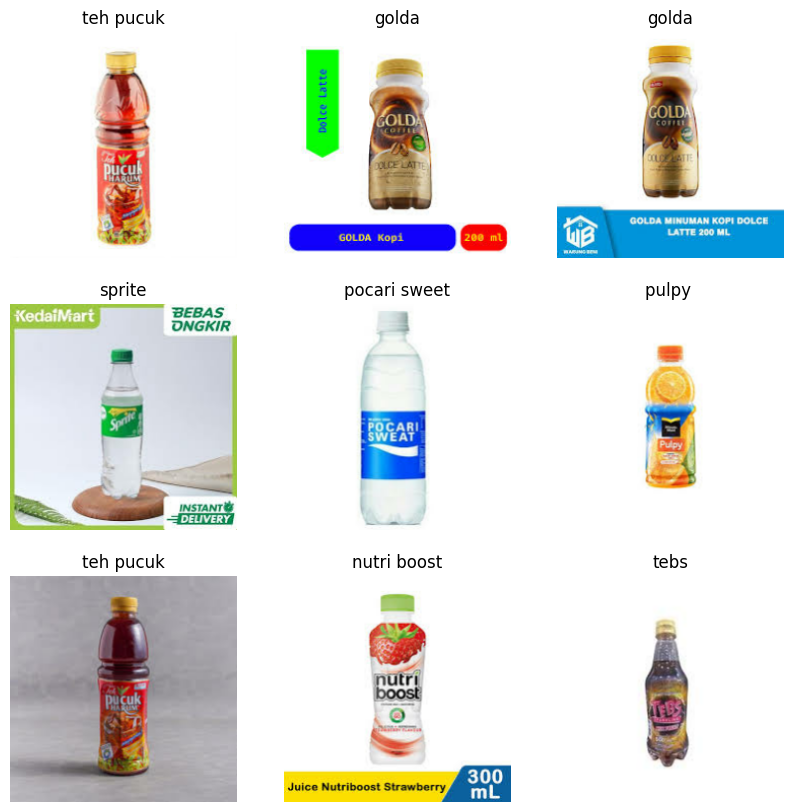

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [12]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 2
Number of test batches: 0


In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [14]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomContrast(0.2),
  tf.keras.layers.RandomBrightness(0.2),
])

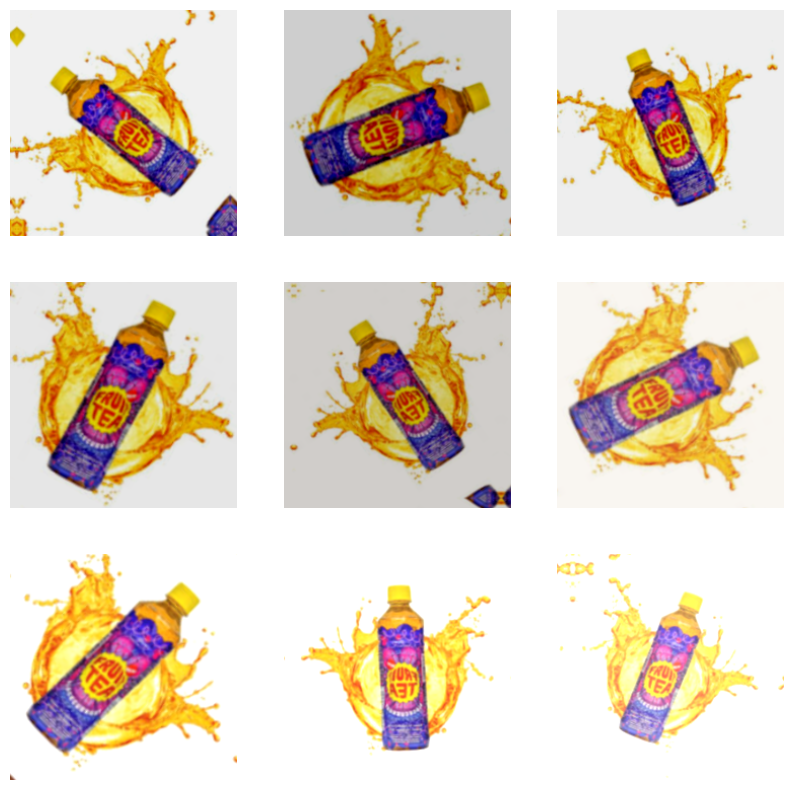

In [15]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [16]:
preprocess_input = tf.keras.applications.efficientnet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./255, offset=-1)

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Create and Training Model

In [18]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.EfficientNetV2M(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

214201816/214201816 [==============================] - 1s 0us/step


In [19]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [20]:
base_model.trainable = False

In [21]:
base_model.summary()

Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 24)         648       ['rescaling_1[0][0]']         
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 112, 112, 24)         96        ['stem_conv[0][0]']           
 n)                                                                                

In [22]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [23]:
prediction_layer = tf.keras.layers.Dense(len(class_names))
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 14)


In [24]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [25]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetv2-m (Function  (None, 7, 7, 1280)        53150388  
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 14)                17934 

In [27]:
len(model.trainable_variables)

2

In [28]:
initial_epochs = 100
loss0, accuracy0 = model.evaluate(validation_dataset)

2/2 [==============================] - 21s 2s/step - loss: 2.6778 - accuracy: 0.0769


In [29]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.68
initial accuracy: 0.08


In [30]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, mode='min')
callback_reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor="val_loss",
                            factor=0.25,
                            patience=1,
                            verbose=1,
                            min_lr=1e-7
                        )

In [31]:
with tf.device('/GPU:0'):
    history = model.fit(train_dataset,
                      epochs=initial_epochs,
                      validation_data=validation_dataset,
                      callbacks=[early_stopping, callback_reduce_lr])

Epoch 1/100
5/5 [==============================] - 25s 931ms/step - loss: 2.5930 - accuracy: 0.1571 - val_loss: 2.4404 - val_accuracy: 0.2564 - lr: 0.0010
Epoch 2/100
5/5 [==============================] - 2s 427ms/step - loss: 2.3317 - accuracy: 0.2929 - val_loss: 2.2329 - val_accuracy: 0.4359 - lr: 0.0010
Epoch 3/100
5/5 [==============================] - 2s 362ms/step - loss: 2.1326 - accuracy: 0.4571 - val_loss: 2.0529 - val_accuracy: 0.4615 - lr: 0.0010
Epoch 4/100
5/5 [==============================] - 2s 372ms/step - loss: 1.9672 - accuracy: 0.5714 - val_loss: 1.8915 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 5/100
5/5 [==============================] - 2s 398ms/step - loss: 1.7769 - accuracy: 0.7000 - val_loss: 1.7486 - val_accuracy: 0.7179 - lr: 0.0010
Epoch 6/100
5/5 [==============================] - 2s 393ms/step - loss: 1.6216 - accuracy: 0.7357 - val_loss: 1.6261 - val_accuracy: 0.6923 - lr: 0.0010
Epoch 7/100
5/5 [==============================] - 2s 366ms/step - loss: 1.

In [32]:
loss, accuracy = model.evaluate(validation_dataset)
print('Test accuracy :', accuracy)

2/2 [==============================] - 0s 79ms/step - loss: 0.5663 - accuracy: 0.8718
Test accuracy : 0.8717948794364929


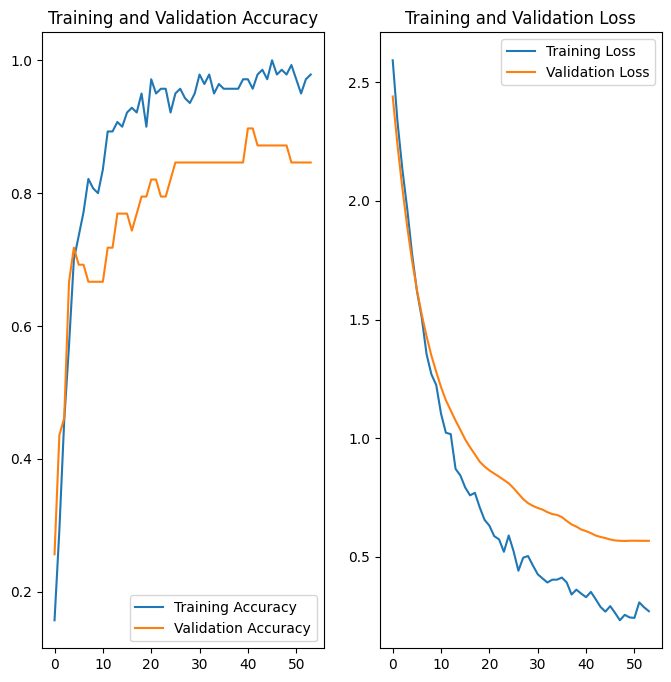

In [33]:
# Plot the training and validation accuracy and loss at each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
model.save("saved_model/saved_model_format", include_optimizer=False)

In [35]:
(tf. __version__)

'2.15.0'

In [36]:
model.save("/content/drive/MyDrive/Dataset_Capstone/saved_model/model_saved")

In [37]:
tf.saved_model.save(model,"saved_model/h5" )

In [38]:
!zip -r "/content/saved_model.zip" "/content/saved_model/h5"

  adding: content/saved_model/h5/ (stored 0%)
  adding: content/saved_model/h5/variables/ (stored 0%)
  adding: content/saved_model/h5/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/saved_model/h5/variables/variables.index (deflated 77%)
  adding: content/saved_model/h5/fingerprint.pb (stored 0%)
  adding: content/saved_model/h5/assets/ (stored 0%)
  adding: content/saved_model/h5/saved_model.pb (deflated 92%)


# Fine tune 1

In [39]:
base_model.trainable = True

In [40]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 300

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  740


In [41]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetv2-m (Function  (None, 7, 7, 1280)        53150388  
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 14)                17934 

In [42]:
len(model.trainable_variables)

387

In [43]:
fine_tune_epochs = 0
total_epochs =  initial_epochs + fine_tune_epochs
with tf.device('/GPU:0'):
  history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=[early_stopping,callback_reduce_lr])

Epoch 54/100
5/5 [==============================] - 72s 2s/step - loss: 11.4270 - accuracy: 0.3571 - val_loss: 2.6543 - val_accuracy: 0.0769 - lr: 5.0000e-04
Epoch 55/100
5/5 [==============================] - ETA: 0s - loss: 2.7160 - accuracy: 0.0643
Epoch 55: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
5/5 [==============================] - 3s 554ms/step - loss: 2.7160 - accuracy: 0.0643 - val_loss: 2.8150 - val_accuracy: 0.0769 - lr: 5.0000e-04
Epoch 56/100
5/5 [==============================] - 3s 632ms/step - loss: 2.7180 - accuracy: 0.0643 - val_loss: 2.6449 - val_accuracy: 0.0769 - lr: 1.2500e-04
Epoch 57/100
5/5 [==============================] - ETA: 0s - loss: 2.6638 - accuracy: 0.0571
Epoch 57: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
5/5 [==============================] - 3s 576ms/step - loss: 2.6638 - accuracy: 0.0571 - val_loss: 2.6547 - val_accuracy: 0.0769 - lr: 1.2500e-04
Epoch 58/100
5/5 [==============================]

In [44]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

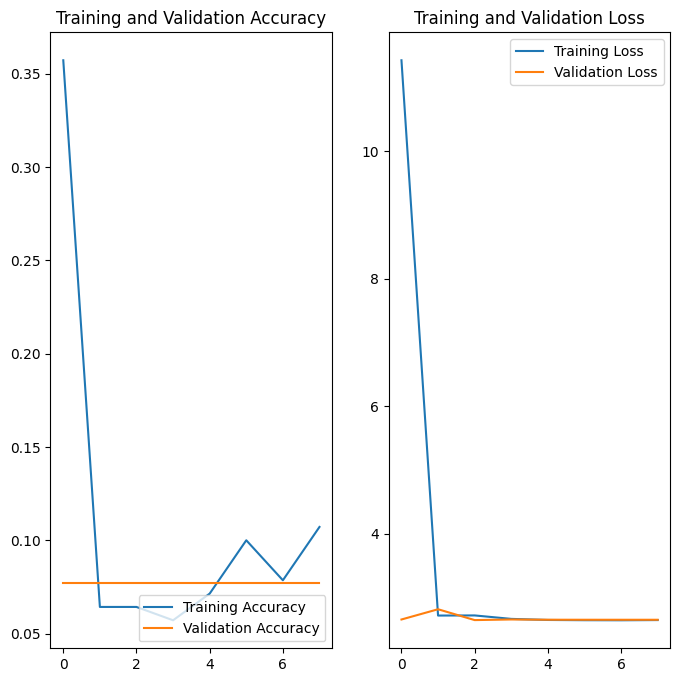

In [45]:
# Plot the training and validation accuracy and loss at each epoch
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']

val_loss = history_fine.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
loss, accuracy = model.evaluate(validation_dataset)
print('Test accuracy :', accuracy)

2/2 [==============================] - 0s 73ms/step - loss: 2.6449 - accuracy: 0.0769
Test accuracy : 0.07692307978868484


In [47]:
!mkdir -p saved_model
history_fine.model.save('saved_model/my_model')

In [48]:
history_fine.model.save('saved_model/my_model_h5/my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# fine tune 2

In [49]:
base_model.trainable = True

In [50]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 50

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  740


In [51]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetv2-m (Function  (None, 7, 7, 1280)        53150388  
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 14)                17934 

In [52]:
fine_tune_epochs = 50
total_epochs =  initial_epochs + fine_tune_epochs

history_fine_1 = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=[early_stopping])

Epoch 54/150
5/5 [==============================] - 87s 2s/step - loss: 2.9091 - accuracy: 0.0357 - val_loss: 2.6386 - val_accuracy: 0.0769
Epoch 55/150
5/5 [==============================] - 4s 825ms/step - loss: 2.6400 - accuracy: 0.0571 - val_loss: 2.6380 - val_accuracy: 0.0769
Epoch 56/150
5/5 [==============================] - 4s 861ms/step - loss: 2.6389 - accuracy: 0.0786 - val_loss: 2.6376 - val_accuracy: 0.0769
Epoch 57/150
5/5 [==============================] - 5s 821ms/step - loss: 2.6400 - accuracy: 0.0714 - val_loss: 2.6374 - val_accuracy: 0.0769
Epoch 58/150
5/5 [==============================] - 4s 719ms/step - loss: 2.6395 - accuracy: 0.0714 - val_loss: 2.6375 - val_accuracy: 0.0769
Epoch 59/150
5/5 [==============================] - 5s 885ms/step - loss: 2.6395 - accuracy: 0.0714 - val_loss: 2.6373 - val_accuracy: 0.0769
Epoch 60/150
5/5 [==============================] - 4s 802ms/step - loss: 2.6393 - accuracy: 0.0714 - val_loss: 2.6373 - val_accuracy: 0.0769
Epoch 61